
# P Regular , NP Regular 
###6 OM - Dataset , Decider,OnlineStore,  Library Management, Bank, Customer_order, E-Commerce
###1 OM - Testing - Camping

## Training 

### Total instances - 375

### P samples - 72
### NP samples - 303

## Testing 

### Total instances - 30

### P samples - 12
### NP samples - 18



## Setup (installing necessary libraries)

In [1]:
 !pip install "tensorflow-text>=2.10"
 !pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 87.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 4.2 MB/s eta 0:00:00


#Importing Libraries 

In [2]:
import numpy as np
import typing
from typing import Any, Tuple
from sklearn.model_selection import train_test_split

import pathlib

import einops
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import tensorflow as tf
import tensorflow_text as tf_text

#Defining the Shapechecker

In [3]:
#@title
class ShapeChecker():
  def __init__(self):
    # Keep a cache of every axis-name seen
    self.shapes = {}

  def __call__(self, tensor, names, broadcast=False):
    if not tf.executing_eagerly():
      return

    parsed = einops.parse_shape(tensor, names)

    for name, new_dim in parsed.items():
      old_dim = self.shapes.get(name, None)
      
      if (broadcast and new_dim == 1):
        continue

      if old_dim is None:
        # If the axis name is new, add its length to the cache.
        self.shapes[name] = new_dim
        continue

      if new_dim != old_dim:
        raise ValueError(f"Shape mismatch for dimension: '{name}'\n"
                         f"    found: {new_dim}\n"
                         f"    expected: {old_dim}\n")

# Loading the Dataset

In [6]:
import pandas as pd
ORM_data = pd.read_csv('6-OM-camping-test.csv')


#Reading Data from Dataset

In [7]:
ORM_data.head()

,OM_Regular,OM_Prediction
0,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
1,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
2,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
3,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...
4,moduleOM_nameonesigclass1_nameextendsClassattr...,moduleOM_nameonesigclass1_nameextendsClassattr...


In [8]:
OM_Regular = ORM_data['OM_Regular'].values
OM_Prediction = ORM_data['OM_Prediction'].values

In [9]:
X = OM_Regular
Y = OM_Prediction

#### Dividing data as Target and Context

In [10]:
target_raw =  Y
context_raw = X
print(context_raw[-1])

moduleOM_name:0,openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_type,onesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_type,onesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4+c3_at5+c3_at6id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigc3_at5extendsc3_at5_typeonesigc3_at6extendsc3_at6_type,onesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at3noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_type,onesigclass5_nameextendsClassattrSet=c5_at1oneparentparentinclass2_nameid=c2_at1isAbstract=No}onesigc5_at1extendsc5_at1_type,onesigclass6_nameextendsClassattrSet=c6_at1_0+c6_at2+c

In [11]:
print(target_raw[-1])

moduleOM_name:0,openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_type,onesigclass2_nameextendsClassattrSet=c2_at1+c2_at2id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_type,onesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4+c3_at5+c3_at6id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigc3_at5extendsc3_at5_typeonesigc3_at6extendsc3_at6_type,onesigclass4_nameextendsClassattrSet=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at3noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_type,onesigclass5_nameextendsClassattrSet=c5_at1oneparentparentinclass2_nameid=c2_at1isAbstract=No}onesigc5_at1extendsc5_at1_type,onesigclass6_nameextendsClassattrSet=c6_at1_0+c6_at2+c

### Create a tf.data dataset

From these arrays of strings you can create a `tf.data.Dataset` of strings that shuffles and batches them efficiently:

In [12]:
BUFFER_SIZE = len(context_raw)
BATCH_SIZE = 1

is_train = np.random.uniform(size=(len(target_raw),)) < 0.8

train_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[is_train], target_raw[is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))
val_raw = (
    tf.data.Dataset
    .from_tensor_slices((context_raw[~is_train], target_raw[~is_train]))
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE))

In [13]:
for example_context_strings, example_target_strings in train_raw.take(1):
  print(example_context_strings[:5])
  print()
  print(example_target_strings[:5])
  break

tf.Tensor([b'moduleOM_name:0,openDeclarationonesigclass1_nameextendsClassattrSet=c1_at1id=c1_at1isAbstract=Nonoparent}onesigc1_at1extendsc1_at1_type,onesigclass01_nameextendsClassattrSet=c01_at1id=c01_at1isAbstract=Nonoparent}onesigc01_at1extendsc01_at1_type,onesigassoc1extendsAssociationsrc=class1_namedst=class01_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc,}onesigclass2_nameextendsClassattrSet=c2_at1id=c2_at1isAbstract=Nonoparent}onesigc2_at1extendsc2_at1_type,onesigassoc2extendsAssociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc,}onesigclass3_nameextendsClassattrSet=c3_at1+c3_at2id=c3_at1isAbstract=Nonoparent}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_type,onesigclass4_nameextendsClassattrSet=c4_at1oneparentid=c3_at1isAbstract=Noparentinclass3_name}onesigc4_at1extendsc4_at1_type,onesigassoc3extendsAssociationdst=class2_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc,}onesigclass5_nameextendsClassatt

### Text preprocessing

One of the goals of this tutorial is to build a model that can be exported as a `tf.saved_model`. To make that exported model useful it should take `tf.string` inputs, and return `tf.string` outputs: All the text processing happens inside the model. Mainly using a `layers.TextVectorization` layer.

#### Standardization

The model is dealing with multilingual text with a limited vocabulary. So it will be important to standardize the input text.

The first step is Unicode normalization to split accented characters and replace compatibility characters with their ASCII equivalents.

The `tensorflow_text` package contains a unicode normalize operation, We may or may not decide to Use this for ORM data. I kept it in the experiment

In [14]:
example_text = tf.constant('moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparentisAbstract=No}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_at3_typeonesigc6_at4extendsc6_at4_typeonesigassoc1extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc2extendsAssociationsrc=class1_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc3extendsAssociationsrc=class4_namedst=class5_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc}onesigassoc4extendsAssociationsrc=class1_namedst=class6_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}onesigassoc5extendsAssociationsrc=class1_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc2}predshowrunshowfor38,​OM_name_Solution:0Table:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class1_nameAttributec1_at2:c1_at2_typeTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at2:c2_at2_typeTable:class2_nameAttributec2_at3:c2_at3_typeTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class3_nameAttributec3_at4:c3_at4_typeTable:class3_nameAttributec3_at2:c3_at2_typeTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class5_nameAttributec5_at3:c5_at3_typeTable:class5_nameAttributec5_at4:c5_at4_typeTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTable:class6_nameAttributec6_at2:c6_at2_typeTable:class6_nameAttributec6_at3:c6_at3_typeTable:class6_nameAttributec6_at4:c6_at4_typeTable:class1_nameAttributec1_at1:c1_at1_typePrimaryKeyTable:class2_nameAttributec2_at1:c1_at1_typePrimaryKeyTable:class3_nameAttributec3_at1:c3_at1_typePrimaryKeyTable:class4_nameAttributec4_at1:c4_at1_typePrimaryKeyTable:class6_nameAttributec6_at1:c6_at1_typePrimaryKeyTableName:class1_nameTableName:class2_nameTableName:class3_nameTableName:class4_nameTableName:class5_nameTableName:class6_nameMappingStrategyofTableclass1_name:map_str2MappingStrategyofTableclass2_name:map_str2MappingStrategyofTableclass3_name:map_str2MappingStrategyofTableclass4_name:map_str2MappingStrategyofTableclass6_name:map_str2AssociationStrategyforassoc1:assoc_type1AssociationStrategyforassoc2:assoc_type1AssociationStrategyforassoc3:assoc_type2AssociationStrategyforassoc4:assoc_type2AssociationStrategyforassoc5:assoc_type2,USEOM_name0----CREATETABLE`assoc1`(`c5_at1`c5_at1_type`c1_at1`c1_at1_typeKEY`FK_assoc1_c5_at1_idx`(`c5_at1`)KEY`FK_assoc1_c1_at1_idx`(`c1_at1`)PRIMARYKEY(`c5_at1``c1_at1`));----CREATETABLE`assoc3``c5_at1`c5_at1_type`c4_at1`c4_at1_typeKEY`FK_assoc3_c5_at1_idx`(`c5_at1`)KEY`FK_assoc3_c4_at1_idx`(`c4_at1`)PRIMARYKEY(`c5_at1``c4_at1`));----CREATETABLE`class5_name`(`c5_at4`c5_at4_type(64)`c5_at3`c5_at3_type(64)`c1_at1`c1_at1_type`c5_at1`c5_at1_typePRIMARYKEY(`c5_at1`));----CREATETABLE`class3_name`(`c3_at3`c3_at3_type(64)`c3_at2`c3_at2_type(64)`c3_at4`c3_at4_type`c3_at1`c3_at1_typeNOTNULLPRIMARYKEY(`c3_at1`));----CREATETABLE`class2_name`(`c2_at3`c2_at3_type(64)`c2_at2`c2_at2_type(64)`c2_at4`c2_at4_type`c2_at1`c2_at1_typePRIMARYKEY(`c2_at1`));----CREATETABLE`class4_name`(`c4_at1`c4_at1_typePRIMARYKEY(`c4_at1`));----CREATETABLE`class1_name`(`c1_at2`c1_at2_type(64)`c1_at1`c1_at1_typePRIMARYKEY(`c1_at1`));----CREATETABLE`class6_name`(`c6_at4`c6_at4_type`c6_at3`c6_at3_type`c6_at2`c6_at2_type`c6_at1`c6_at1_typeNOTNULLPRIMARYKEY(`c6_at1`));----CREATETABLE`assoc2`(`c5_at1`c5_at1_type`c2_at1`c2_at1_typeKEY`FK_assoc2_c5_at1_idx`(`c5_at1`)KEY`FK_assoc2_c2_at1_idx`(`c2_at1`)PRIMARYKEY(`c5_at1``c2_at1`));----CREATETABLE`assoc5`(`c3_at1`c3_at1_typeNOTNULL`c2_at1`c2_at1_typeKEY`FK_assoc5_c3_at1_idx`(`c3_at1`)KEY`FK_assoc5_c2_at1_idx`(`c2_at1`)PRIMARYKEY(`c3_at1``c2_at1`));----CREATETABLE`assoc4`(`c6_at1`c6_at1_typeNOTNULL`c2_at1`c2_at1_typeKEY`FK_assoc4_c6_at1_idx`(`c6_at1`)KEY`FK_assoc4_c2_at1_idx`(`c2_at1`)PRIMARYKEY(`c6_at1``c2_at1`));ALTERTABLE`assoc1`ADDCONSTRAINT`FK_assoc1_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc1_c1_at1`FOREIGNKEY(`c1_at1`)REFERENCES`class1_name`(`c1_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc3`ADDCONSTRAINT`FK_assoc3_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc3_c4_at1`FOREIGNKEY(`c4_at1`)REFERENCES`class4_name`(`c4_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc2`ADDCONSTRAINT`FK_assoc2_c5_at1`FOREIGNKEY(`c5_at1`)REFERENCES`class5_name`(`c5_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc2_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADEALTERTABLE`assoc5`ADDCONSTRAINT`FK_assoc5_c3_at1`FOREIGNKEY(`c3_at1`)REFERENCES`class3_name`(`c3_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc5_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE;ALTERTABLE`assoc4`ADDCONSTRAINT`FK_assoc4_c6_at1`FOREIGNKEY(`c6_at1`)REFERENCES`class6_name`(`c6_at1`)ONDELETECASCADEONUPDATECASCADEADDCONSTRAINT`FK_assoc4_c2_at1`FOREIGNKEY(`c2_at1`)REFERENCES`class2_name`(`c2_at1`)ONDELETECASCADEONUPDATECASCADE')

#example_text = tf.constant('class1,table2,obj1,atr1')
#print(example_text.numpy())
#print(tf_text.normalize_utf8(example_text, 'NFKD').numpy())

In [15]:
#import re

#def tf_lower_and_split_punct(text):

def tf_lower_and_split_punct(text):
  # Split accented characters.
  text = tf_text.normalize_utf8(text, 'NFKD')
  text = tf.strings.lower(text)
  # Keep space, a to z, and select punctuation.
  text = tf.strings.regex_replace(text, '', '')
  # Add spaces around punctuation.
  text = tf.strings.regex_replace(text, '', r'')
  # Strip whitespace.
  text = tf.strings.strip(text)

  text = tf.strings.join(['[START]', text, '[END]'], separator=' ')
  return text





In [16]:
print(example_text.numpy().decode())
print(tf_lower_and_split_punct(example_text).numpy().decode())

moduleOM_nameopenDeclarationonesigclass1_nameextendsClassattrSet=c1_at1+c1_at2id=c1_at1noparentisAbstract=No}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsClassattrSet=c2_at1+c2_at2+c2_at3+c2_at4id=c2_at1noparentisAbstract=No}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigc2_at3extendsc2_at3_typeonesigc2_at4extendsc2_at4_typeonesigclass3_nameextendsClassattrSet=c3_at1+c3_at2+c3_at3+c3_at4id=c3_at1noparentisAbstract=No}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigc3_at3extendsc3_at3_typeonesigc3_at4extendsc3_at4_typeonesigclass4_nameextendsClassattrSet=c4_at1id=c4_at1noparentisAbstract=No}onesigc4_at1extendsc4_at1_typeonesigclass5_nameextendsClassattrSet=c5_at1+c5_at2+c5_at3+c5_at4id=c5_at1noparentisAbstract=No}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigc5_at3extendsc5_at3_typeonesigc5_at4extendsc5_at4_typeonesigclass6_nameextendsClassattrSet=c6_at1+c6_at2+c6_at3+c6_at4id=c6_at1noparenti

#### Text Vectorization

This standardization function will be wrapped up in a `tf.keras.layers.TextVectorization` layer which will handle the vocabulary extraction and conversion of input text to sequences of tokens.

In [17]:
max_vocab_size = 5000

context_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

The `TextVectorization` layer and many other [Keras preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) have an `adapt` method. This method reads one epoch of the training data, and works a lot like `Model.fit`. This `adapt` method initializes the layer based on the data. Here it determines the vocabulary:

In [18]:
context_text_processor.adapt(train_raw.map(lambda context, target: context))

# Here are the first 10 words from the vocabulary:
#context_text_processor.get_vocabulary()[:10]

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


That's the context data  `TextVectorization` layer, now build and `.adapt()` for the Target Data one:

In [19]:
target_text_processor = tf.keras.layers.TextVectorization(
    standardize=tf_lower_and_split_punct,
    max_tokens=max_vocab_size,
    ragged=True)

target_text_processor.adapt(train_raw.map(lambda context, target: target))
#target_text_processor.get_vocabulary()[:10]

Now these layers can convert a batch of strings into a batch of token IDs:

In [20]:
example_tokens = context_text_processor(example_context_strings)
example_tokens[:3, :]

<tf.RaggedTensor [[2, 8, 3]]>

The `get_vocabulary` method can be used to convert token IDs back to text:

In [21]:
context_vocab = np.array(context_text_processor.get_vocabulary())
tokens = context_vocab[example_tokens[0].numpy()]
' '.join(tokens)

'[START] moduleom_name:0,opendeclarationonesigclass1_nameextendsclassattrset=c1_at1id=c1_at1isabstract=nonoparent}onesigc1_at1extendsc1_at1_type,onesigclass01_nameextendsclassattrset=c01_at1id=c01_at1isabstract=nonoparent}onesigc01_at1extendsc01_at1_type,onesigassoc1extendsassociationsrc=class1_namedst=class01_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc,}onesigclass2_nameextendsclassattrset=c2_at1id=c2_at1isabstract=nonoparent}onesigc2_at1extendsc2_at1_type,onesigassoc2extendsassociationsrc=class1_namedst=class2_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc,}onesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1isabstract=nonoparent}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_type,onesigclass4_nameextendsclassattrset=c4_at1oneparentid=c3_at1isabstract=noparentinclass3_name}onesigc4_at1extendsc4_at1_type,onesigassoc3extendsassociationdst=class2_namedst=class3_namesrc_multiplicity=src_mlpcdst_multiplicity=dst_mlpc,}onesigclass5_nameextendsclassattrset

The returned token IDs are zero-padded. This can easily be turned into a mask:

Text(0.5, 1.0, 'Mask')

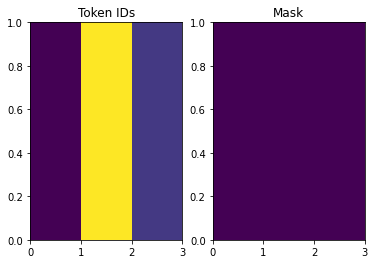

In [22]:
plt.subplot(1, 2, 1)
plt.pcolormesh(example_tokens.to_tensor())
plt.title('Token IDs')

plt.subplot(1, 2, 2)
plt.pcolormesh(example_tokens.to_tensor() != 0)
plt.title('Mask')

### Process the dataset



The `process_text` function below converts the `Datasets` of strings, into  0-padded tensors of token IDs. It also converts from a `(context, target)` pair to an `((context, target_in), target_out)` pair for training with `keras.Model.fit`. Keras expects `(inputs, labels)` pairs, the inputs are the `(context, target_in)` and the labels are `target_out`. The difference between `target_in` and `target_out` is that they are shifted by one step relative to eachother, so that at each location the label is the next token.

In [23]:
def process_text(context, target):
  context = context_text_processor(context).to_tensor()
  target = target_text_processor(target)
  targ_in = target[:,:-1].to_tensor()
  targ_out = target[:,1:].to_tensor()
  return (context, targ_in), targ_out


train_ds = train_raw.map(process_text, tf.data.AUTOTUNE)
val_ds = val_raw.map(process_text, tf.data.AUTOTUNE)

Here is the first sequence of each, from the first batch:

In [24]:
for (ex_context_tok, ex_tar_in), ex_tar_out in train_ds.take(1):
  print(ex_context_tok[0, :10].numpy()) 
  print()
  print(ex_tar_in[0, :10].numpy()) 
  print(ex_tar_out[0, :10].numpy()) 

[ 2 18  3]

[ 2 19]
[19  3]


## The encoder/decoder

  <th colspan=1>This tutorial's model</th>
<tr>
</table>


Before getting into it define constants for the model:

In [25]:
UNITS = 256

### The encoder


The encoder:

1. Takes a list of token IDs (from `context_text_processor`).
3. Looks up an embedding vector for each token (Using a `layers.Embedding`).
4. Processes the embeddings into a new sequence (Using a bidirectional `layers.GRU`).
5. Returns the processed sequence. This will be passed to the attention head.

In [26]:
class Encoder(tf.keras.layers.Layer):
  def __init__(self, text_processor, units):
    super(Encoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.units = units
    
    # The embedding layer converts tokens to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size, units,
                                               mask_zero=True)

    # The RNN layer processes those vectors sequentially.
    self.rnn = tf.keras.layers.Bidirectional(
        merge_mode='sum',
        layer=tf.keras.layers.GRU(units,
                            # Return the sequence and state
                            return_sequences=True,
                            recurrent_initializer='glorot_uniform'))

  def call(self, x):
    shape_checker = ShapeChecker()
    shape_checker(x, 'batch s')

    # 2. The embedding layer looks up the embedding vector for each token.
    x = self.embedding(x)
    shape_checker(x, 'batch s units')

    # 3. The GRU processes the sequence of embeddings.
    x = self.rnn(x)
    shape_checker(x, 'batch s units')

    # 4. Returns the new sequence of embeddings.
    return x

  def convert_input(self, texts):
    texts = tf.convert_to_tensor(texts)
    if len(texts.shape) == 0:
      texts = tf.convert_to_tensor(texts)[tf.newaxis]
    context = self.text_processor(texts).to_tensor()
    context = self(context)
    return context

In [27]:
# Encode the input sequence.
encoder = Encoder(context_text_processor, UNITS)
ex_context = encoder(ex_context_tok)

print(f'Context tokens, shape (batch, s): {ex_context_tok.shape}')
print(f'Encoder output, shape (batch, s, units): {ex_context.shape}')

Context tokens, shape (batch, s): (1, 3)
Encoder output, shape (batch, s, units): (1, 3, 256)


### The attention layer

The attention layer lets the decoder access the information extracted by the encoder. It computes a vector from the entire context sequence, and adds that to the decoder's output. 


In [28]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self, units, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(key_dim=units, num_heads=1, **kwargs)
    self.layernorm = tf.keras.layers.LayerNormalization()
    self.add = tf.keras.layers.Add()

  def call(self, x, context):
    shape_checker = ShapeChecker()
 
    shape_checker(x, 'batch t units')
    shape_checker(context, 'batch s units')

    attn_output, attn_scores = self.mha(
       query=x,
       value=context,
      return_attention_scores=True)
    
    shape_checker(x, 'batch t units')
    shape_checker(attn_scores, 'batch heads t s')
    
  #Cache the attention scores for plotting later.
    attn_scores = tf.reduce_mean(attn_scores, axis=1)
    shape_checker(attn_scores, 'batch t s')
    self.last_attention_weights = attn_scores

    x = self.add([x, attn_output])
    x = self.layernorm(x)

    return x

In [29]:
attention_layer = CrossAttention(UNITS)

# Attend to the encoded tokens
embed = tf.keras.layers.Embedding(target_text_processor.vocabulary_size(),
                                 output_dim=UNITS, mask_zero=True)
ex_tar_embed = embed(ex_tar_in)

result = attention_layer(ex_tar_embed, ex_context)

print(f'Context sequence, shape (batch, s, units): {ex_context.shape}')
print(f'Target sequence, shape (batch, t, units): {ex_tar_embed.shape}')
print(f'Attention result, shape (batch, t, units): {result.shape}')
print(f'Attention weights, shape (batch, t, s):    {attention_layer.last_attention_weights.shape}')

Context sequence, shape (batch, s, units): (1, 3, 256)
Target sequence, shape (batch, t, units): (1, 2, 256)
Attention result, shape (batch, t, units): (1, 2, 256)
Attention weights, shape (batch, t, s):    (1, 2, 3)


The attention weights will sum to `1` over the context sequence, at each location in the target sequence.

In [30]:
attention_layer.last_attention_weights[0].numpy().sum(axis=-1)

array([1., 1.], dtype=float32)



Here are the attention weights across the context sequences at `t=0`:

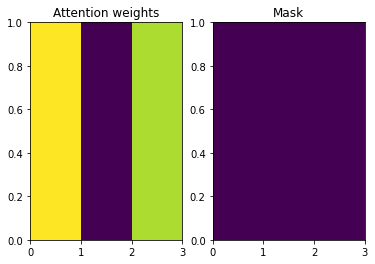

In [31]:
attention_weights = attention_layer.last_attention_weights
mask=(ex_context_tok != 0).numpy()

plt.subplot(1, 2, 1)
plt.pcolormesh(mask*attention_weights[:, 0, :])
plt.title('Attention weights')

plt.subplot(1, 2, 2)
plt.pcolormesh(mask)
plt.title('Mask');

Because of the small-random initialization the attention weights are initially all close to `1/(sequence_length)`. The model will learn to make these less uniform as training progresses.

### The decoder

The decoder's job is to generate predictions for the next token at each location in the target sequence.

1. It looks up embeddings for each token in the target sequence.
2. It uses an RNN to process the target sequence, and keep track of what it has generated so far.
3. It uses RNN output as the "query" to the attention layer, when attending to the encoder's output.
4. At each location in the output it predicts the next token.


Here is the `Decoder` class' initializer. The initializer creates all the necessary layers.

In [32]:
class Decoder(tf.keras.layers.Layer):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, text_processor, units):
    super(Decoder, self).__init__()
    self.text_processor = text_processor
    self.vocab_size = text_processor.vocabulary_size()
    self.word_to_id = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]')
    self.id_to_word = tf.keras.layers.StringLookup(
        vocabulary=text_processor.get_vocabulary(),
        mask_token='', oov_token='[UNK]',
        invert=True)
    self.start_token = self.word_to_id('[START]')
    self.end_token = self.word_to_id('[END]')

    self.units = units


    # 1. The embedding layer converts token IDs to vectors
    self.embedding = tf.keras.layers.Embedding(self.vocab_size,
                                               units, mask_zero=True)

    # 2. The RNN keeps track of what's been generated so far.
    self.rnn = tf.keras.layers.GRU(units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

    # 3. The RNN output will be the query for the attention layer.
    self.attention = CrossAttention(units)

    # 4. This fully connected layer produces the logits for each
    # output token.
    self.output_layer = tf.keras.layers.Dense(self.vocab_size)

#### Training

Next, the `call` method, takes 3 arguments:

* `inputs` -  a `context, x` pair where:
  * `context` - is the context from the encoder's output.
  * `x` - is the target sequence input.
* `state` - Optional, the previous `state` output from the decoder (the internal state of the decoder's RNN). Pass the state from a previous run to continue generating text where you left off.
* `return_state` - [Default: False] - Set this to `True` to return the RNN state. 

In [33]:
@Decoder.add_method
def call(self,
         context, x,
         state=None,
         return_state=False):  
  shape_checker = ShapeChecker()
  shape_checker(x, 'batch t')
  shape_checker(context, 'batch s units')

  # 1. Lookup the embeddings
  x = self.embedding(x)
  shape_checker(x, 'batch t units')

  # 2. Process the target sequence.
  x, state = self.rnn(x, initial_state=state)
  shape_checker(x, 'batch t units')

  # 3. Use the RNN output as the query for the attention over the context.
  x = self.attention(x, context)
  self.last_attention_weights = self.attention.last_attention_weights
  shape_checker(x, 'batch t units')
  shape_checker(self.last_attention_weights, 'batch t s')

  # Step 4. Generate logit predictions for the next token.
  logits = self.output_layer(x)
  shape_checker(logits, 'batch t target_vocab_size')

  if return_state:
    return logits, state
  else:
    return logits

That will be sufficient for training. Create an instance of the decoder to test out:

In [34]:
decoder = Decoder(target_text_processor, UNITS)

Decoder usage

In [35]:
logits = decoder(ex_context, ex_tar_in)

print(f'encoder output shape: (batch, s, units) {ex_context.shape}')
print(f'input target tokens shape: (batch, t) {ex_tar_in.shape}')
print(f'logits shape shape: (batch, target_vocabulary_size) {logits.shape}')

encoder output shape: (batch, s, units) (1, 3, 256)
input target tokens shape: (batch, t) (1, 2)
logits shape shape: (batch, target_vocabulary_size) (1, 2, 254)


#### Inference

For inference usage couple more methods.

In [36]:
@Decoder.add_method
def get_initial_state(self, context):
  batch_size = tf.shape(context)[0]
  start_tokens = tf.fill([batch_size, 1], self.start_token)
  done = tf.zeros([batch_size, 1], dtype=tf.bool)
  embedded = self.embedding(start_tokens)
  return start_tokens, done, self.rnn.get_initial_state(embedded)[0]

In [37]:
@Decoder.add_method
def tokens_to_text(self, tokens):
  words = self.id_to_word(tokens)
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  result = tf.strings.regex_replace(result, '^ *\[START\] *', '')
  result = tf.strings.regex_replace(result, ' *\[END\] *$', '')
  return result

In [38]:
@Decoder.add_method
def get_next_token(self, context, next_token, done, state, temperature = 0.0):
  logits, state = self(
    context, next_token,
    state = state,
    return_state=True) 
  
  if temperature == 0.0:
    next_token = tf.argmax(logits, axis=-1)
  else:
    logits = logits[:, -1, :]/temperature
    next_token = tf.random.categorical(logits, num_samples=1)

  # If a sequence produces an `end_token`, set it `done`
  done = done | (next_token == self.end_token)
  # Once a sequence is done it only produces 0-padding.
  next_token = tf.where(done, tf.constant(0, dtype=tf.int64), next_token)
  
  return next_token, done, state

With those extra functions, you can write a generation loop:

In [39]:
# Setup the loop variables.
next_token, done, state = decoder.get_initial_state(ex_context)
tokens = []

for n in range(10):
  # Run one step.
  next_token, done, state = decoder.get_next_token(
      ex_context, next_token, done, state, temperature=1.0)
  # Add the token to the output.
  tokens.append(next_token)

# Stack all the tokens together.
tokens = tf.concat(tokens, axis=-1) # (batch, t)

# Convert the tokens back to a a string
result = decoder.tokens_to_text(tokens)
#result[:3].numpy()

## The model


In [40]:
class Translator(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, units,
               context_text_processor,
               target_text_processor):
    super().__init__()
    # Build the encoder and decoder
    encoder = Encoder(context_text_processor, units)
    decoder = Decoder(target_text_processor, units)

    self.encoder = encoder
    self.decoder = decoder

  def call(self, inputs):
    context, x = inputs
    context = self.encoder(context)
    logits = self.decoder(context, x)

    #TODO(b/250038731): remove this
    try:
      # Delete the keras mask, so keras doesn't scale the loss+accuracy. 
      del logits._keras_mask
    except AttributeError:
      pass

    return logits

During training the model will be used like this:

In [41]:
model = Translator(UNITS, context_text_processor, target_text_processor)

logits = model((ex_context_tok, ex_tar_in))

print(f'Context tokens, shape: (batch, s, units) {ex_context_tok.shape}')
print(f'Target tokens, shape: (batch, t) {ex_tar_in.shape}')
print(f'logits, shape: (batch, t, target_vocabulary_size) {logits.shape}')

Context tokens, shape: (batch, s, units) (1, 3)
Target tokens, shape: (batch, t) (1, 2)
logits, shape: (batch, t, target_vocabulary_size) (1, 2, 254)


### Train

In [42]:
def masked_loss(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')
    loss = loss_fn(y_true, y_pred)

    # Mask off the losses on padding.
    mask = tf.cast(y_true != 0, loss.dtype)
    loss *= mask

    # Return the total.
    return tf.reduce_sum(loss)/tf.reduce_sum(mask)

In [43]:
def masked_acc(y_true, y_pred):
    # Calculate the loss for each item in the batch.
    y_pred = tf.argmax(y_pred, axis=-1)
    y_pred = tf.cast(y_pred, y_true.dtype)
    
    match = tf.cast(y_true == y_pred, tf.float32)
    mask = tf.cast(y_true != 0, tf.float32)
    
    return tf.reduce_sum(match)/tf.reduce_sum(mask)

Configure the model for training:

In [44]:
model.compile(optimizer='Adam',
              loss=masked_loss, 
              metrics=[masked_acc, masked_loss])

The model is randomly initialized, and should give roughly uniform output probabilities. So it's easy to predict what the initial values of the metrics should be:

In [45]:
vocab_size = 1.0 * target_text_processor.vocabulary_size()

{"expected_loss": tf.math.log(vocab_size).numpy(),
 "expected_acc": 1/vocab_size}

{'expected_loss': 5.5373344, 'expected_acc': 0.003937007874015748}

That should roughly match the values returned by running a few steps of evaluation:

In [46]:
model.evaluate(val_ds, steps=70, return_dict=True)

56/70 [=======================>......] - ETA: 0s - loss: 5.2383 - masked_acc: 0.0089 - masked_loss: 5.2383

70/70 [==============================] - 11s 18ms/step - loss: 5.2369 - masked_acc: 0.0088 - masked_loss: 5.2369


{'loss': 5.236900329589844,
 'masked_acc': 0.008771929889917374,
 'masked_loss': 5.236900329589844}

In [47]:
history = model.fit(
    train_ds.repeat(), 
    epochs=100,
    steps_per_epoch = 100,
    validation_data=val_ds,
    validation_steps = 70,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=8)])

Epoch 1/100
100/100 [==============================] - ETA: 0s - loss: 3.3662 - masked_acc: 0.4950 - masked_loss: 3.3662

100/100 [==============================] - 22s 34ms/step - loss: 3.3662 - masked_acc: 0.4950 - masked_loss: 3.3662 - val_loss: 3.1766 - val_masked_acc: 0.5000 - val_masked_loss: 3.1766
Epoch 2/100
100/100 [==============================] - ETA: 0s - loss: 3.2140 - masked_acc: 0.5000 - masked_loss: 3.2140

100/100 [==============================] - 3s 27ms/step - loss: 3.2140 - masked_acc: 0.5000 - masked_loss: 3.2140
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 3.3426 - masked_acc: 0.5000 - masked_loss: 3.3426

100/100 [==============================] - 3s 35ms/step - loss: 3.3368 - masked_acc: 0.5000 - masked_loss: 3.3368
Epoch 4/100
100/100 [==============================] - ETA: 0s - loss: 3.3495 - masked_acc: 0.5000 - masked_loss: 3.3495

100/100 [==============================] - 3s 29ms/step - loss: 3.3495 - masked_acc: 0.5000 - masked_loss: 3.3495
Epoch 5/100
100/100 [==============================] - ETA: 0s - loss: 3.1719 - masked_acc: 0.5150 - masked_loss: 3.1719

100/100 [==============================] - 3s 26ms/step - loss: 3.1719 - masked_acc: 0.5150 - masked_loss: 3.1719
Epoch 6/100
 99/100 [============================>.] - ETA: 0s - loss: 3.2708 - masked_acc: 0.5101 - masked_loss: 3.2708

100/100 [==============================] - 3s 27ms/step - loss: 3.2689 - masked_acc: 0.5100 - masked_loss: 3.2689
Epoch 7/100
100/100 [==============================] - ETA: 0s - loss: 2.8453 - masked_acc: 0.5000 - masked_loss: 2.8453

100/100 [==============================] - 3s 28ms/step - loss: 2.8453 - masked_acc: 0.5000 - masked_loss: 2.8453
Epoch 8/100
100/100 [==============================] - ETA: 0s - loss: 2.7225 - masked_acc: 0.5150 - masked_loss: 2.7225

100/100 [==============================] - 4s 36ms/step - loss: 2.7225 - masked_acc: 0.5150 - masked_loss: 2.7225
Epoch 9/100
100/100 [==============================] - ETA: 0s - loss: 2.7207 - masked_acc: 0.5050 - masked_loss: 2.7207

100/100 [==============================] - 3s 26ms/step - loss: 2.7207 - masked_acc: 0.5050 - masked_loss: 2.7207
Epoch 10/100
100/100 [==============================] - ETA: 0s - loss: 2.4426 - masked_acc: 0.5350 - masked_loss: 2.4426

100/100 [==============================] - 3s 26ms/step - loss: 2.4426 - masked_acc: 0.5350 - masked_loss: 2.4426
Epoch 11/100
100/100 [==============================] - ETA: 0s - loss: 2.2688 - masked_acc: 0.5600 - masked_loss: 2.2688

100/100 [==============================] - 3s 27ms/step - loss: 2.2688 - masked_acc: 0.5600 - masked_loss: 2.2688
Epoch 12/100
 99/100 [============================>.] - ETA: 0s - loss: 2.3327 - masked_acc: 0.5505 - masked_loss: 2.3327

100/100 [==============================] - 4s 39ms/step - loss: 2.3361 - masked_acc: 0.5500 - masked_loss: 2.3361
Epoch 13/100
100/100 [==============================] - ETA: 0s - loss: 2.0217 - masked_acc: 0.5900 - masked_loss: 2.0217

100/100 [==============================] - 3s 26ms/step - loss: 2.0217 - masked_acc: 0.5900 - masked_loss: 2.0217
Epoch 14/100
 99/100 [============================>.] - ETA: 0s - loss: 2.0045 - masked_acc: 0.5606 - masked_loss: 2.0045

100/100 [==============================] - 3s 26ms/step - loss: 2.0066 - masked_acc: 0.5600 - masked_loss: 2.0066
Epoch 15/100
 99/100 [============================>.] - ETA: 0s - loss: 1.8691 - masked_acc: 0.6061 - masked_loss: 1.8691

100/100 [==============================] - 3s 27ms/step - loss: 1.8700 - masked_acc: 0.6050 - masked_loss: 1.8700
Epoch 16/100
 99/100 [============================>.] - ETA: 0s - loss: 1.8401 - masked_acc: 0.6111 - masked_loss: 1.8401

100/100 [==============================] - 4s 35ms/step - loss: 1.8333 - masked_acc: 0.6150 - masked_loss: 1.8333
Epoch 17/100
100/100 [==============================] - ETA: 0s - loss: 1.3678 - masked_acc: 0.6700 - masked_loss: 1.3678

100/100 [==============================] - 3s 31ms/step - loss: 1.3678 - masked_acc: 0.6700 - masked_loss: 1.3678
Epoch 18/100
100/100 [==============================] - ETA: 0s - loss: 1.4533 - masked_acc: 0.6500 - masked_loss: 1.4533

100/100 [==============================] - 3s 28ms/step - loss: 1.4533 - masked_acc: 0.6500 - masked_loss: 1.4533
Epoch 19/100
100/100 [==============================] - ETA: 0s - loss: 1.6979 - masked_acc: 0.6050 - masked_loss: 1.6979

100/100 [==============================] - 3s 28ms/step - loss: 1.6979 - masked_acc: 0.6050 - masked_loss: 1.6979
Epoch 20/100
 99/100 [============================>.] - ETA: 0s - loss: 1.1478 - masked_acc: 0.7172 - masked_loss: 1.1478

100/100 [==============================] - 3s 32ms/step - loss: 1.1449 - masked_acc: 0.7200 - masked_loss: 1.1449
Epoch 21/100
 99/100 [============================>.] - ETA: 0s - loss: 1.1060 - masked_acc: 0.6919 - masked_loss: 1.1060

100/100 [==============================] - 3s 34ms/step - loss: 1.0953 - masked_acc: 0.6950 - masked_loss: 1.0953
Epoch 22/100
 99/100 [============================>.] - ETA: 0s - loss: 1.2552 - masked_acc: 0.6768 - masked_loss: 1.2552

100/100 [==============================] - 3s 27ms/step - loss: 1.2478 - masked_acc: 0.6800 - masked_loss: 1.2478
Epoch 23/100
 99/100 [============================>.] - ETA: 0s - loss: 0.6937 - masked_acc: 0.8232 - masked_loss: 0.6937

100/100 [==============================] - 3s 28ms/step - loss: 0.6885 - masked_acc: 0.8250 - masked_loss: 0.6885
Epoch 24/100
100/100 [==============================] - ETA: 0s - loss: 0.7968 - masked_acc: 0.7600 - masked_loss: 0.7968

100/100 [==============================] - 3s 27ms/step - loss: 0.7968 - masked_acc: 0.7600 - masked_loss: 0.7968
Epoch 25/100
 98/100 [============================>.] - ETA: 0s - loss: 0.8255 - masked_acc: 0.7551 - masked_loss: 0.8255

100/100 [==============================] - 4s 38ms/step - loss: 0.8239 - masked_acc: 0.7550 - masked_loss: 0.8239
Epoch 26/100
 98/100 [============================>.] - ETA: 0s - loss: 0.5678 - masked_acc: 0.8571 - masked_loss: 0.5678

100/100 [==============================] - 3s 26ms/step - loss: 0.5626 - masked_acc: 0.8600 - masked_loss: 0.5626
Epoch 27/100
 98/100 [============================>.] - ETA: 0s - loss: 0.4168 - masked_acc: 0.8980 - masked_loss: 0.4168

100/100 [==============================] - 3s 26ms/step - loss: 0.4234 - masked_acc: 0.8950 - masked_loss: 0.4234
Epoch 28/100
100/100 [==============================] - ETA: 0s - loss: 0.4579 - masked_acc: 0.9300 - masked_loss: 0.4579

100/100 [==============================] - 3s 25ms/step - loss: 0.4579 - masked_acc: 0.9300 - masked_loss: 0.4579
Epoch 29/100
 99/100 [============================>.] - ETA: 0s - loss: 0.3977 - masked_acc: 0.9091 - masked_loss: 0.3977

100/100 [==============================] - 3s 35ms/step - loss: 0.3959 - masked_acc: 0.9100 - masked_loss: 0.3959
Epoch 30/100
100/100 [==============================] - ETA: 0s - loss: 0.1207 - masked_acc: 1.0000 - masked_loss: 0.1207

100/100 [==============================] - 3s 26ms/step - loss: 0.1207 - masked_acc: 1.0000 - masked_loss: 0.1207
Epoch 31/100
100/100 [==============================] - ETA: 0s - loss: 0.2127 - masked_acc: 0.9700 - masked_loss: 0.2127

100/100 [==============================] - 2s 25ms/step - loss: 0.2127 - masked_acc: 0.9700 - masked_loss: 0.2127
Epoch 32/100
 99/100 [============================>.] - ETA: 0s - loss: 0.2068 - masked_acc: 0.9747 - masked_loss: 0.2068

100/100 [==============================] - 3s 25ms/step - loss: 0.2049 - masked_acc: 0.9750 - masked_loss: 0.2049
Epoch 33/100
100/100 [==============================] - ETA: 0s - loss: 0.0946 - masked_acc: 0.9900 - masked_loss: 0.0946

100/100 [==============================] - 3s 25ms/step - loss: 0.0946 - masked_acc: 0.9900 - masked_loss: 0.0946
Epoch 34/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0467 - masked_acc: 1.0000 - masked_loss: 0.0467

100/100 [==============================] - 4s 37ms/step - loss: 0.0464 - masked_acc: 1.0000 - masked_loss: 0.0464
Epoch 35/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0811 - masked_acc: 0.9899 - masked_loss: 0.0811

100/100 [==============================] - 3s 25ms/step - loss: 0.0805 - masked_acc: 0.9900 - masked_loss: 0.0805
Epoch 36/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0588 - masked_acc: 0.9899 - masked_loss: 0.0588

100/100 [==============================] - 3s 26ms/step - loss: 0.0585 - masked_acc: 0.9900 - masked_loss: 0.0585
Epoch 37/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0315 - masked_acc: 0.9949 - masked_loss: 0.0315

100/100 [==============================] - 3s 25ms/step - loss: 0.0318 - masked_acc: 0.9950 - masked_loss: 0.0318
Epoch 38/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0919 - masked_acc: 0.9848 - masked_loss: 0.0919

100/100 [==============================] - 3s 33ms/step - loss: 0.0910 - masked_acc: 0.9850 - masked_loss: 0.0910
Epoch 39/100
100/100 [==============================] - ETA: 0s - loss: 0.0290 - masked_acc: 0.9950 - masked_loss: 0.0290

100/100 [==============================] - 3s 28ms/step - loss: 0.0290 - masked_acc: 0.9950 - masked_loss: 0.0290
Epoch 40/100
100/100 [==============================] - ETA: 0s - loss: 0.0553 - masked_acc: 0.9900 - masked_loss: 0.0553

100/100 [==============================] - 3s 25ms/step - loss: 0.0553 - masked_acc: 0.9900 - masked_loss: 0.0553
Epoch 41/100
100/100 [==============================] - ETA: 0s - loss: 0.0348 - masked_acc: 0.9950 - masked_loss: 0.0348

100/100 [==============================] - 3s 27ms/step - loss: 0.0348 - masked_acc: 0.9950 - masked_loss: 0.0348
Epoch 42/100
100/100 [==============================] - ETA: 0s - loss: 0.0287 - masked_acc: 0.9950 - masked_loss: 0.0287

100/100 [==============================] - 3s 30ms/step - loss: 0.0287 - masked_acc: 0.9950 - masked_loss: 0.0287
Epoch 43/100
100/100 [==============================] - ETA: 0s - loss: 0.0449 - masked_acc: 0.9900 - masked_loss: 0.0449

100/100 [==============================] - 4s 38ms/step - loss: 0.0449 - masked_acc: 0.9900 - masked_loss: 0.0449
Epoch 44/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0284 - masked_acc: 0.9949 - masked_loss: 0.0284

100/100 [==============================] - 3s 28ms/step - loss: 0.0282 - masked_acc: 0.9950 - masked_loss: 0.0282
Epoch 45/100
100/100 [==============================] - ETA: 0s - loss: 0.0316 - masked_acc: 0.9950 - masked_loss: 0.0316

100/100 [==============================] - 3s 28ms/step - loss: 0.0316 - masked_acc: 0.9950 - masked_loss: 0.0316
Epoch 46/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0075 - masked_acc: 1.0000 - masked_loss: 0.0075

100/100 [==============================] - 3s 26ms/step - loss: 0.0075 - masked_acc: 1.0000 - masked_loss: 0.0075
Epoch 47/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0463 - masked_acc: 0.9898 - masked_loss: 0.0463

100/100 [==============================] - 4s 40ms/step - loss: 0.0456 - masked_acc: 0.9900 - masked_loss: 0.0456
Epoch 48/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0516 - masked_acc: 0.9898 - masked_loss: 0.0516

100/100 [==============================] - 3s 28ms/step - loss: 0.0507 - masked_acc: 0.9900 - masked_loss: 0.0507
Epoch 49/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0684 - masked_acc: 0.9848 - masked_loss: 0.0684

100/100 [==============================] - 3s 26ms/step - loss: 0.0678 - masked_acc: 0.9850 - masked_loss: 0.0678
Epoch 50/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0444 - masked_acc: 0.9899 - masked_loss: 0.0444

100/100 [==============================] - 3s 26ms/step - loss: 0.0440 - masked_acc: 0.9900 - masked_loss: 0.0440
Epoch 51/100
100/100 [==============================] - ETA: 0s - loss: 0.0069 - masked_acc: 1.0000 - masked_loss: 0.0069

100/100 [==============================] - 4s 38ms/step - loss: 0.0069 - masked_acc: 1.0000 - masked_loss: 0.0069
Epoch 52/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0061 - masked_acc: 1.0000 - masked_loss: 0.0061

100/100 [==============================] - 3s 26ms/step - loss: 0.0061 - masked_acc: 1.0000 - masked_loss: 0.0061
Epoch 53/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0226 - masked_acc: 0.9949 - masked_loss: 0.0226

100/100 [==============================] - 3s 25ms/step - loss: 0.0224 - masked_acc: 0.9950 - masked_loss: 0.0224
Epoch 54/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0868 - masked_acc: 0.9798 - masked_loss: 0.0868

100/100 [==============================] - 3s 26ms/step - loss: 0.0859 - masked_acc: 0.9800 - masked_loss: 0.0859
Epoch 55/100
100/100 [==============================] - ETA: 0s - loss: 0.0053 - masked_acc: 1.0000 - masked_loss: 0.0053

100/100 [==============================] - 3s 28ms/step - loss: 0.0053 - masked_acc: 1.0000 - masked_loss: 0.0053
Epoch 56/100
100/100 [==============================] - ETA: 0s - loss: 0.2293 - masked_acc: 0.9500 - masked_loss: 0.2293

100/100 [==============================] - 3s 35ms/step - loss: 0.2293 - masked_acc: 0.9500 - masked_loss: 0.2293
Epoch 57/100
 99/100 [============================>.] - ETA: 0s - loss: 0.6865 - masked_acc: 0.8131 - masked_loss: 0.6865

100/100 [==============================] - 3s 26ms/step - loss: 0.6797 - masked_acc: 0.8150 - masked_loss: 0.6797
Epoch 58/100
 98/100 [============================>.] - ETA: 0s - loss: 0.8778 - masked_acc: 0.7347 - masked_loss: 0.8778

100/100 [==============================] - 3s 26ms/step - loss: 0.8690 - masked_acc: 0.7400 - masked_loss: 0.8690
Epoch 59/100
100/100 [==============================] - ETA: 0s - loss: 0.5114 - masked_acc: 0.8450 - masked_loss: 0.5114

100/100 [==============================] - 3s 27ms/step - loss: 0.5114 - masked_acc: 0.8450 - masked_loss: 0.5114
Epoch 60/100
100/100 [==============================] - ETA: 0s - loss: 0.5561 - masked_acc: 0.8600 - masked_loss: 0.5561

100/100 [==============================] - 4s 38ms/step - loss: 0.5561 - masked_acc: 0.8600 - masked_loss: 0.5561
Epoch 61/100
100/100 [==============================] - ETA: 0s - loss: 0.2195 - masked_acc: 0.9450 - masked_loss: 0.2195

100/100 [==============================] - 3s 27ms/step - loss: 0.2195 - masked_acc: 0.9450 - masked_loss: 0.2195
Epoch 62/100
 99/100 [============================>.] - ETA: 0s - loss: 0.2397 - masked_acc: 0.9394 - masked_loss: 0.2397

100/100 [==============================] - 3s 26ms/step - loss: 0.2373 - masked_acc: 0.9400 - masked_loss: 0.2373
Epoch 63/100
 99/100 [============================>.] - ETA: 0s - loss: 0.2733 - masked_acc: 0.9192 - masked_loss: 0.2733

100/100 [==============================] - 2s 25ms/step - loss: 0.2709 - masked_acc: 0.9200 - masked_loss: 0.2709
Epoch 64/100
 99/100 [============================>.] - ETA: 0s - loss: 0.1782 - masked_acc: 0.9444 - masked_loss: 0.1782

100/100 [==============================] - 3s 30ms/step - loss: 0.1764 - masked_acc: 0.9450 - masked_loss: 0.1764
Epoch 65/100
 99/100 [============================>.] - ETA: 0s - loss: 0.4017 - masked_acc: 0.8990 - masked_loss: 0.4017

100/100 [==============================] - 3s 32ms/step - loss: 0.3978 - masked_acc: 0.9000 - masked_loss: 0.3978
Epoch 66/100
100/100 [==============================] - ETA: 0s - loss: 0.1153 - masked_acc: 0.9800 - masked_loss: 0.1153

100/100 [==============================] - 3s 26ms/step - loss: 0.1153 - masked_acc: 0.9800 - masked_loss: 0.1153
Epoch 67/100
100/100 [==============================] - ETA: 0s - loss: 0.1475 - masked_acc: 0.9600 - masked_loss: 0.1475

100/100 [==============================] - 3s 26ms/step - loss: 0.1475 - masked_acc: 0.9600 - masked_loss: 0.1475
Epoch 68/100
100/100 [==============================] - ETA: 0s - loss: 0.0876 - masked_acc: 0.9850 - masked_loss: 0.0876

100/100 [==============================] - 3s 26ms/step - loss: 0.0876 - masked_acc: 0.9850 - masked_loss: 0.0876
Epoch 69/100
100/100 [==============================] - ETA: 0s - loss: 0.1165 - masked_acc: 0.9750 - masked_loss: 0.1165

100/100 [==============================] - 4s 37ms/step - loss: 0.1165 - masked_acc: 0.9750 - masked_loss: 0.1165
Epoch 70/100
100/100 [==============================] - ETA: 0s - loss: 0.0401 - masked_acc: 0.9900 - masked_loss: 0.0401

100/100 [==============================] - 2s 25ms/step - loss: 0.0401 - masked_acc: 0.9900 - masked_loss: 0.0401
Epoch 71/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0400 - masked_acc: 0.9899 - masked_loss: 0.0400

100/100 [==============================] - 3s 26ms/step - loss: 0.0397 - masked_acc: 0.9900 - masked_loss: 0.0397
Epoch 72/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0485 - masked_acc: 0.9899 - masked_loss: 0.0485

100/100 [==============================] - 3s 26ms/step - loss: 0.0481 - masked_acc: 0.9900 - masked_loss: 0.0481
Epoch 73/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0236 - masked_acc: 0.9949 - masked_loss: 0.0236

100/100 [==============================] - 3s 32ms/step - loss: 0.0234 - masked_acc: 0.9950 - masked_loss: 0.0234
Epoch 74/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0330 - masked_acc: 0.9898 - masked_loss: 0.0330

100/100 [==============================] - 3s 29ms/step - loss: 0.0479 - masked_acc: 0.9850 - masked_loss: 0.0479
Epoch 75/100
100/100 [==============================] - ETA: 0s - loss: 0.0200 - masked_acc: 0.9950 - masked_loss: 0.0200

100/100 [==============================] - 3s 26ms/step - loss: 0.0200 - masked_acc: 0.9950 - masked_loss: 0.0200
Epoch 76/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0217 - masked_acc: 0.9949 - masked_loss: 0.0217

100/100 [==============================] - 3s 26ms/step - loss: 0.0215 - masked_acc: 0.9950 - masked_loss: 0.0215
Epoch 77/100
100/100 [==============================] - ETA: 0s - loss: 0.0447 - masked_acc: 0.9850 - masked_loss: 0.0447

100/100 [==============================] - 3s 26ms/step - loss: 0.0447 - masked_acc: 0.9850 - masked_loss: 0.0447
Epoch 78/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0025 - masked_acc: 1.0000 - masked_loss: 0.0025

100/100 [==============================] - 4s 36ms/step - loss: 0.0025 - masked_acc: 1.0000 - masked_loss: 0.0025
Epoch 79/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0325 - masked_acc: 0.9899 - masked_loss: 0.0325

100/100 [==============================] - 3s 26ms/step - loss: 0.0321 - masked_acc: 0.9900 - masked_loss: 0.0321
Epoch 80/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0020 - masked_acc: 1.0000 - masked_loss: 0.0020

100/100 [==============================] - 3s 26ms/step - loss: 0.0020 - masked_acc: 1.0000 - masked_loss: 0.0020
Epoch 81/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0030 - masked_acc: 1.0000 - masked_loss: 0.0030

100/100 [==============================] - 3s 26ms/step - loss: 0.0030 - masked_acc: 1.0000 - masked_loss: 0.0030
Epoch 82/100
100/100 [==============================] - ETA: 0s - loss: 0.0458 - masked_acc: 0.9850 - masked_loss: 0.0458

100/100 [==============================] - 3s 31ms/step - loss: 0.0458 - masked_acc: 0.9850 - masked_loss: 0.0458
Epoch 83/100
100/100 [==============================] - ETA: 0s - loss: 0.0306 - masked_acc: 0.9900 - masked_loss: 0.0306

100/100 [==============================] - 3s 32ms/step - loss: 0.0306 - masked_acc: 0.9900 - masked_loss: 0.0306
Epoch 84/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0265 - masked_acc: 0.9899 - masked_loss: 0.0265

100/100 [==============================] - 3s 25ms/step - loss: 0.0262 - masked_acc: 0.9900 - masked_loss: 0.0262
Epoch 85/100
100/100 [==============================] - ETA: 0s - loss: 0.0168 - masked_acc: 0.9950 - masked_loss: 0.0168

100/100 [==============================] - 2s 25ms/step - loss: 0.0168 - masked_acc: 0.9950 - masked_loss: 0.0168
Epoch 86/100
100/100 [==============================] - ETA: 0s - loss: 0.0151 - masked_acc: 0.9950 - masked_loss: 0.0151

100/100 [==============================] - 3s 25ms/step - loss: 0.0151 - masked_acc: 0.9950 - masked_loss: 0.0151
Epoch 87/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0020 - masked_acc: 1.0000 - masked_loss: 0.0020

100/100 [==============================] - 4s 37ms/step - loss: 0.0020 - masked_acc: 1.0000 - masked_loss: 0.0020
Epoch 88/100
100/100 [==============================] - ETA: 0s - loss: 0.0121 - masked_acc: 0.9950 - masked_loss: 0.0121

100/100 [==============================] - 3s 26ms/step - loss: 0.0121 - masked_acc: 0.9950 - masked_loss: 0.0121
Epoch 89/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0476 - masked_acc: 0.9847 - masked_loss: 0.0476

100/100 [==============================] - 3s 25ms/step - loss: 0.0467 - masked_acc: 0.9850 - masked_loss: 0.0467
Epoch 90/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0141 - masked_acc: 0.9949 - masked_loss: 0.0141

100/100 [==============================] - 3s 26ms/step - loss: 0.0140 - masked_acc: 0.9950 - masked_loss: 0.0140
Epoch 91/100
100/100 [==============================] - ETA: 0s - loss: 0.0394 - masked_acc: 0.9850 - masked_loss: 0.0394

100/100 [==============================] - 3s 28ms/step - loss: 0.0394 - masked_acc: 0.9850 - masked_loss: 0.0394
Epoch 92/100
 98/100 [============================>.] - ETA: 0s - loss: 0.0138 - masked_acc: 0.9949 - masked_loss: 0.0138

100/100 [==============================] - 4s 35ms/step - loss: 0.0136 - masked_acc: 0.9950 - masked_loss: 0.0136
Epoch 93/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0145 - masked_acc: 0.9949 - masked_loss: 0.0145

100/100 [==============================] - 3s 26ms/step - loss: 0.0143 - masked_acc: 0.9950 - masked_loss: 0.0143
Epoch 94/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0121 - masked_acc: 0.9949 - masked_loss: 0.0121

100/100 [==============================] - 3s 26ms/step - loss: 0.0120 - masked_acc: 0.9950 - masked_loss: 0.0120
Epoch 95/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0313 - masked_acc: 0.9899 - masked_loss: 0.0313

100/100 [==============================] - 3s 25ms/step - loss: 0.0310 - masked_acc: 0.9900 - masked_loss: 0.0310
Epoch 96/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0011 - masked_acc: 1.0000 - masked_loss: 0.0011

100/100 [==============================] - 4s 39ms/step - loss: 0.0011 - masked_acc: 1.0000 - masked_loss: 0.0011
Epoch 97/100
100/100 [==============================] - ETA: 0s - loss: 0.0024 - masked_acc: 1.0000 - masked_loss: 0.0024

100/100 [==============================] - 3s 26ms/step - loss: 0.0024 - masked_acc: 1.0000 - masked_loss: 0.0024
Epoch 98/100
100/100 [==============================] - ETA: 0s - loss: 0.0630 - masked_acc: 0.9800 - masked_loss: 0.0630

100/100 [==============================] - 3s 26ms/step - loss: 0.0630 - masked_acc: 0.9800 - masked_loss: 0.0630
Epoch 99/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0138 - masked_acc: 0.9949 - masked_loss: 0.0138

100/100 [==============================] - 3s 25ms/step - loss: 0.0137 - masked_acc: 0.9950 - masked_loss: 0.0137
Epoch 100/100
 99/100 [============================>.] - ETA: 0s - loss: 0.0208 - masked_acc: 0.9949 - masked_loss: 0.0208

100/100 [==============================] - 3s 28ms/step - loss: 0.0206 - masked_acc: 0.9950 - masked_loss: 0.0206


## Plotting the Loss from Training 

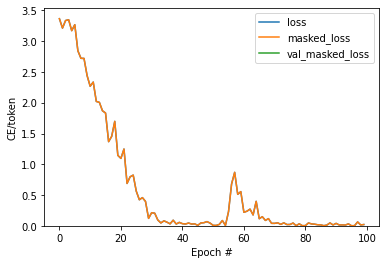

In [48]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['masked_loss'], label='masked_loss')
plt.plot(history.history['val_masked_loss'], label='val_masked_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

## Plotting the aacuracy from the training

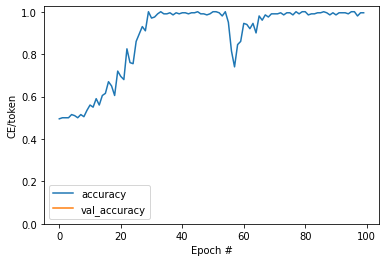

In [49]:
plt.plot(history.history['masked_acc'], label='accuracy')
plt.plot(history.history['val_masked_acc'], label='val_accuracy')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

### Translate Module Development

Now that the model is trained, implement a function to execute the full `text => text` translation. This code is basically identical to the [inference example](#inference) in the [decoder section](#the_decoder), but this also captures the attention weights.

In [50]:
#@title
@Translator.add_method
def translate(self,
              texts, *,
              max_length=50,
              temperature=0.0):
  # Process the input texts
  context = self.encoder.convert_input(texts)
  batch_size = tf.shape(texts)[0]

  # Setup the loop inputs
  tokens = []
  attention_weights = []
  next_token, done, state = self.decoder.get_initial_state(context)

  for _ in range(max_length):
    # Generate the next token
    next_token, done, state = self.decoder.get_next_token(
        context, next_token, done,  state, temperature)
        
    # Collect the generated tokens
    tokens.append(next_token)
    attention_weights.append(self.decoder.last_attention_weights)
    
    if tf.executing_eagerly() and tf.reduce_all(done):
      break

  # Stack the lists of tokens and attention weights.
  tokens = tf.concat(tokens, axis=-1)   # t*[(batch 1)] -> (batch, t)
  self.last_attention_weights = tf.concat(attention_weights, axis=1)  # t*[(batch 1 s)] -> (batch, t s)

  result = self.decoder.tokens_to_text(tokens)
  return result

Here are the two helper methods, used above, to convert tokens to text, and to get the next token:

In [51]:
#Individual translator mechanism, can be used to translate each data separately


result1 = model.translate([''])

result2 = model.translate([''])

result23 = model.translate([''])

result222 = model.translate([''])
#result1[0].numpy().decode()
#result2[0].numpy().decode()



### Attention plot generation after model training has been completed

In [52]:
#@title
@Translator.add_method
def plot_attention(self, text, **kwargs):
  assert isinstance(text, str)
  output = self.translate([text], **kwargs)
  output = output[0].numpy().decode()

  attention = self.last_attention_weights[0]

  context = tf_lower_and_split_punct(text)
  context = context.numpy().decode().split()

  output = tf_lower_and_split_punct(output)
  output = output.numpy().decode().split()[1:]

  fig = plt.figure(figsize=(10, 10))
  ax = fig.add_subplot(1, 1, 1)

  ax.matshow(attention, cmap='viridis', vmin=0.0)

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + context, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + output, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  ax.set_xlabel('Input text')
  ax.set_ylabel('Output text')

In [53]:
#model.plot_attention('') 

Translate a few more sentences and plot them:

The short sentences often work well, but if the input is too long the model literally loses focus and stops providing reasonable predictions. There are two main reasons for this:

1. The model was trained with teacher-forcing feeding the correct token at each step, regardless of the model's predictions. The model could be made more robust if it were sometimes fed its own predictions.
2. The model only has access to its previous output through the RNN state. If the RNN state looses track of where it was in the context sequence there's no way for the model to recover. [Transformers](transformer.ipynb) improve on this by letting the decoder look at what it has output so far.

The raw data is sorted by length, so try translating the longest sequence:

In [54]:
long_text = context_raw[-1]

import textwrap
#print('Expected output:\n', '\n'.join(textwrap.wrap(target_raw[-1])))

# Testing unseen samples

In [57]:
dc = pd.read_csv('Camping.csv')

In [58]:
dc.head()

,OM_Regular,OM_Prediction
0,moduleOM_name:0openDeclarationonesigclass1_nam...,1
1,moduleOM_name:0openDeclarationonesigclass1_nam...,1
2,moduleOM_name:0openDeclarationonesigclass1_nam...,1
3,moduleOM_name:0openDeclarationonesigclass1_nam...,0
4,moduleOM_name:0openDeclarationonesigclass1_nam...,1


### Separating Columns in X_test and y_test

In [59]:
X_test2 = dc['OM_Regular'].values
y_test2 = dc['OM_Prediction'].values

In [60]:
print(X_test2.shape)
print(y_test2.shape)

print("\nX data type: ", X_test2.dtype)
print("y data type: ", y_test2.dtype)

(30,)
(30,)

X data type:  object
y data type:  int64


In [69]:
print(y_test2)

[1 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1]


In [70]:
inputs = X_test2

### Obtaining results from the model of the unseen dataset

In [63]:
 %%time
 for t in inputs:
   mylist_res = model.translate([t])[0].numpy().decode()
   print(model.translate([t])[0].numpy().decode())

 print()

moduleom_name:0opendeclarationonesigclass1_nameextendsclassattrset=c1_at1+c1_at2id=c1_at1noparentisabstract=no}onesigc1_at1extendsc1_at1_typeonesigc1_at2extendsc1_at2_typeonesigclass2_nameextendsclassattrset=c2_at1+c2_at2id=c2_at1noparentisabstract=no}onesigc2_at1extendsc2_at1_typeonesigc2_at2extendsc2_at2_typeonesigclass3_nameextendsclassattrset=c3_at1+c3_at2id=c3_at1noparentisabstract=no}onesigc3_at1extendsc3_at1_typeonesigc3_at2extendsc3_at2_typeonesigclass4_nameextendsclassattrset=c4_at1+c4_at2+c4_at3+c4_at4id=c4_at1noparentisabstract=no}onesigc4_at1extendsc4_at1_typeonesigc4_at2extendsc4_at2_typeonesigc4_at3extendsc4_at3_typeonesigc4_at4extendsc4_at4_typeonesigclass5_nameextendsclassattrset=c5_at1+c5_at2oneparentparentinclass4_nameid=c4_at1isabstract=no}onesigc5_at1extendsc5_at1_typeonesigc5_at2extendsc5_at2_typeonesigclass6_nameextendsclassattrset=c6_at1+c6_at2+c6_at3id=c6_at1noparentisabstract=no}onesigc6_at1extendsc6_at1_typeonesigc6_at2extendsc6_at2_typeonesigc6_at3extendsc6_a

# Classification Report (Unseen samples)


In [71]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, classification_report

### The result is obtained and captured in a separate file, labels are converted to 1 and 0 . Where 1 denotes P and 0 denotes NP. 

###READING the predicted dataset

In [72]:
dd = pd.read_csv('Camping_pred.csv')

In [73]:
dd.head()

,OM_Regular,OM_Prediction
0,moduleOM_name:0openDeclarationonesigclass1_nam...,0
1,moduleOM_name:0openDeclarationonesigclass1_nam...,0
2,moduleOM_name:0openDeclarationonesigclass1_nam...,0
3,moduleOM_name:0openDeclarationonesigclass1_nam...,0
4,moduleOM_name:0openDeclarationonesigclass1_nam...,0


In [74]:
X_test_pred2 = dd['OM_Regular'].values
y_test_pred2 = dd['OM_Prediction'].values

### Printing predicted labels

In [75]:
print (y_test_pred2 )

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [76]:
precision = precision_score(y_test2, y_test_pred2) 
print("Testing: Precision = %f" % precision)


recall = recall_score(y_test2, y_test_pred2)
print("Testing: Recall = %f" % recall)


f1 = f1_score(y_test2, y_test_pred2)
print("Testing: F1 Score = %f" % f1)

print("\nConfusion Matrix (Test Data):\n", confusion_matrix(y_test2, y_test_pred2))

Testing: Precision = 0.000000
Testing: Recall = 0.000000
Testing: F1 Score = 0.000000

Confusion Matrix (Test Data):
 [[18  0]
 [12  0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [77]:
print(classification_report(y_test2,y_test_pred2))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        18
           1       0.00      0.00      0.00        12

    accuracy                           0.60        30
   macro avg       0.30      0.50      0.37        30
weighted avg       0.36      0.60      0.45        30



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
